## StatisticalLearning_Project2 AIML Pune June 2019

### Import the necessary libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
import scipy.stats as stats
import math as math


### Read the data as a data frame

In [44]:
data = pd.read_csv('insurance (1).csv')

### Verification that all data has been read correctly
#### Head of the data is looked into then tail and then randomly sampling 10 data points

In [45]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [47]:
data.sample(10)

,age,sex,bmi,children,smoker,region,charges
519,31,male,30.875,0,no,northeast,3857.75925
586,21,male,20.235,3,no,northeast,3861.20965
31,18,female,26.315,0,no,northeast,2198.18985
405,52,female,38.380,2,no,northeast,11396.90020
714,24,female,22.600,0,no,southwest,2457.50200
149,19,male,28.400,1,no,southwest,1842.51900
407,47,female,23.600,1,no,southwest,8539.67100
1050,44,female,36.955,1,no,northwest,8023.13545
1100,33,female,19.095,2,yes,northeast,16776.30405
571,18,female,37.290,1,no,southeast,2219.44510


### Shape of the data

In [48]:
data.shape

(1338, 7)

##### Insights:
It is seen from the shape output that there are 1338 rows in the dataframe. There are 7 columns also in the dataframe. 

### Data type of each attribute

In [49]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Insights:
- Age, Children are integer data types <br>
- bmi, charges are float type data <br>
- smoker, region and sex are strings/objects <br>

### Checking for null/NaN values in the dataframe

In [50]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [51]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Insights 
- There are no NaN values in the dataframe so no corrective action required on this front

### 5 point summary of numerical attributes in tabular form

In [52]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 5 point summary of numerical data graphically

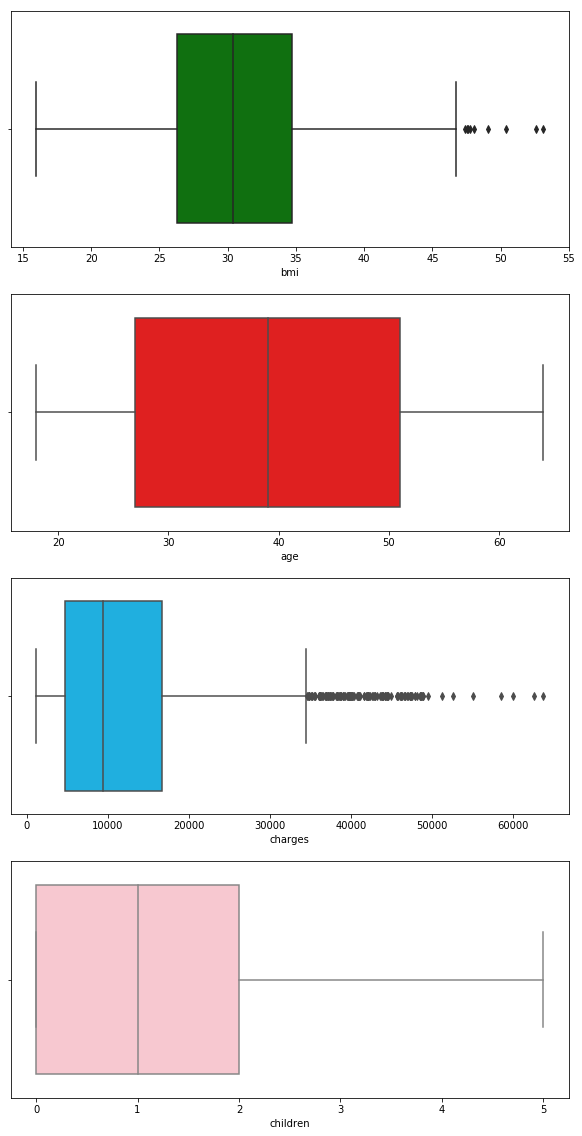

In [53]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (10,20))
sns.boxplot(data['age'], color ='r', ax = axes[1]);
sns.boxplot(data['charges'], color = 'deepskyblue', ax = axes[2]);
sns.boxplot(data['bmi'], color = 'g', ax = axes[0]);
sns.boxplot(data['children'], color = 'pink', ax = axes[3]);

### Insights
It seems the numerical variables are well spread out. 
- charges seems to have high outliers and the max value is very high compared to (75% + 1.5xIQR) and also seen in the box plot. charges also seems to have positive skew in its distribution.
- bmi also seems to have small amount of high out liers though they are not as high as in the case for charges
- only adults are considered for this study as minimum age is 18
- 0-5 children are considered 
- Children data is positively skewed

### Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

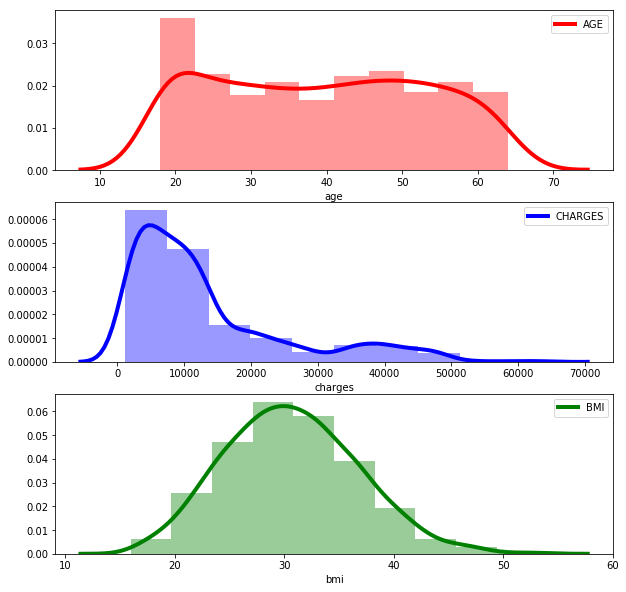

In [54]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (10,10))
sns.distplot(data['age'], bins = 10, color = 'r', ax = axes[0], kde_kws={"color":"r", "lw": 4, "label": "AGE"});
sns.distplot(data['charges'], bins = 10, color = 'b', ax = axes[1], kde_kws={"color":"b", "lw": 4, "label": "CHARGES"});
sns.distplot(data['bmi'], bins = 10, color = 'g', ax = axes[2], kde_kws={"color":"g", "lw": 4, "label": "BMI"});

### Insights 
- The 'bmi' distribution looks very normal with slight right tail (positive skweness)
- All values of 'age' are restricted between 18 and 64. HIghest number of entries are for 18 age. Hence mode is 18.
- 'Charges' is highly positively skewed with very many high outliers and a long tail.

### Measure of skewness of ‘bmi’, ‘age’ and ‘charges’columns

In [55]:
print("Skewness of age column =", data.age.skew())
print("Skewness of bmi column =", data.bmi.skew())
print("Skewness of charges column =", data.charges.skew())

Skewness of age column = 0.05567251565299186
Skewness of bmi column = 0.2840471105987448
Skewness of charges column = 1.5158796580240388


### Insights
- Age and BMI are nearly symmetrical data sets 
- Age in this data set is more symmetrical than BMI as per skewness value
- Age and BMI are not particularly very skewed though BMI is slightly positively skewed as per value of 0.28
- Charges is highly positively skewed with a skewness value of 1.5

### Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

As was shown while displaying 5 point summary in a tabular format, there is a chance of outlier in 'charges'. <br>
This was validated in the box plots (graphical 5 point summary) <br>
Boxplot is a very good way to understand presence of outliers

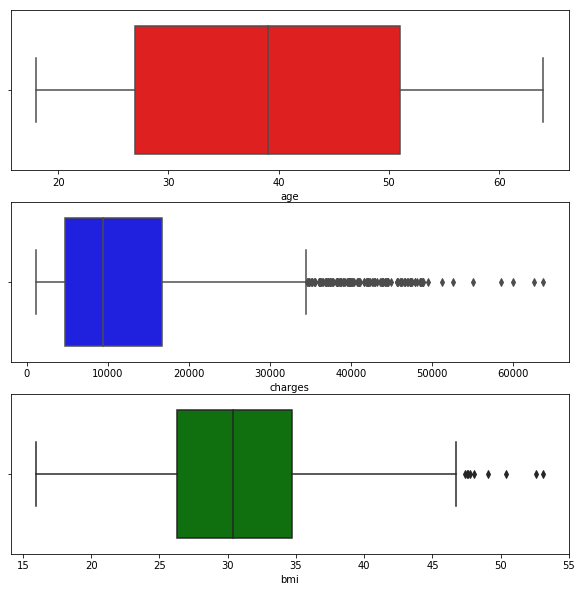

In [56]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (10,10))
sns.boxplot(data['age'], color ='r', ax = axes[0]);
sns.boxplot(data['charges'], color = 'b', ax = axes[1]);
sns.boxplot(data['bmi'], color = 'g', ax = axes[2]);

### Insights
- Charges has many high outliers 
- BMI also has some high outliers
- Age has no outliers

### Distribution of categorical columns (include children)

1 - Count plot of different categorical variables which are 
- smoker (1-smoker; 0-non-smoker)
- sex
- number of children
- region

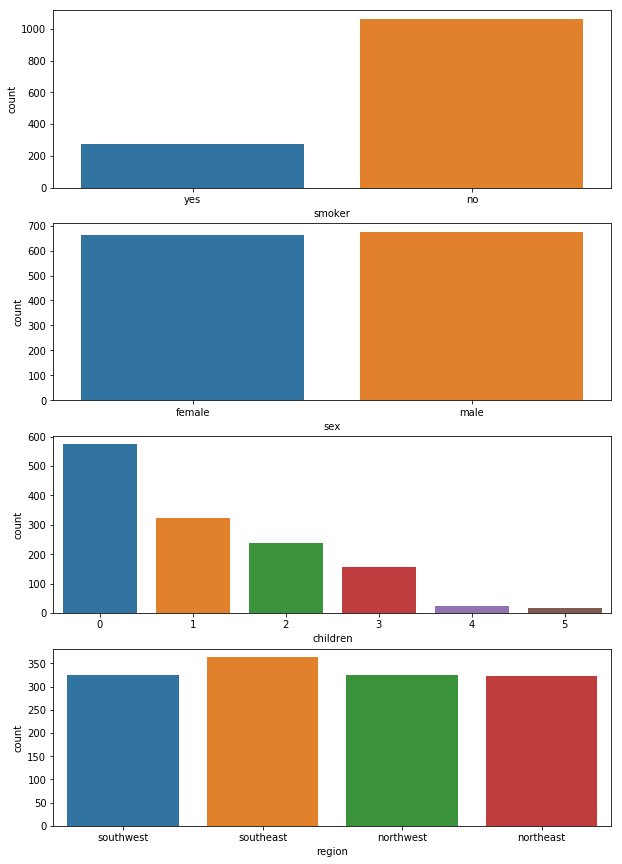

In [57]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (10,15))
sns.countplot(data['smoker'], ax = axes[0]);
sns.countplot(data['sex'], ax = axes[1]);
sns.countplot(data['children'], ax = axes[2]);
sns.countplot(data['region'], ax = axes[3])
plt.show()

### Insights from this set of plots for categorical data
- Number of smokers is significantly less than number of non-smokers in this dataset 
- There are nearly equal number of males and females in the dataset. Slightly higher number of males than females. 
- Most entries in the datasets has no children, the number of people having higher children are less amd compared to lesser numner of children (People having 'N' children are less than people having 'N-1' children)
- The data set consists of upto 5 children
- More data is from South East region as compared to the other regions
- Other regions (apart from South East) are nearly equally represented in the data set 
- More insights from the following plots

2 - How the categorical variables affect each other

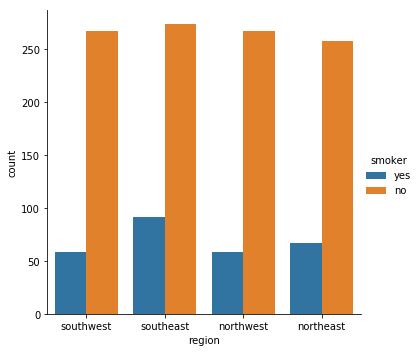

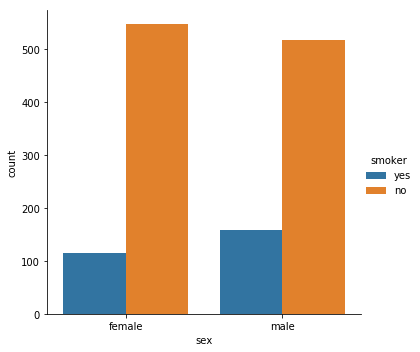

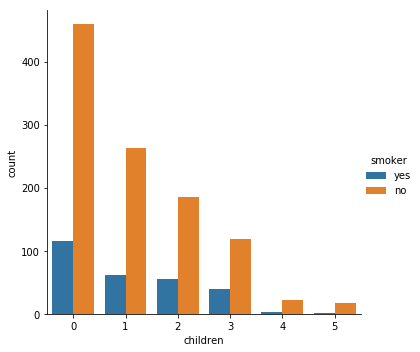

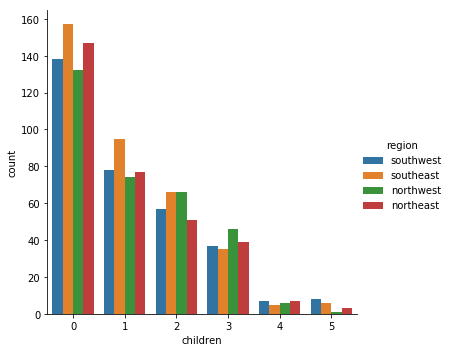

In [58]:
sns.catplot(x = 'region', data = data, kind = 'count',hue = 'smoker')
sns.catplot(x = 'sex', data = data, kind = 'count', hue = 'smoker')
sns.catplot(x = 'children', data = data, kind = 'count', hue = 'smoker')
sns.catplot(x = 'children', data = data, kind = 'count', hue = 'region')

### Insights from the above set of categorical plots
- Although the number of data from south east region is higher (as seen from previous set), it can be seen that the proportion of smokers in South east region may be slightly higher than the other regions. More staistical study is needed to conclusively say anything on this statement.
- Male smokers proportion seems to be higher than female smoker proportion (to be verified statistically later)
- Proportion of smokers seem visually to be not affected by number of children (apart from those with very high number of children)
- Each of the regions have nearly equal reportentation of number of children though North West region seem to have a very low number of people with 5 children.

### Pair plot that includes all the columns of the dataframe

- Since pair plot includes only numerical variables, label encoder is applied to smoker and region also to include them in the pair plot
- Different hues are applied for different inferences

In [59]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder2 = preprocessing.LabelEncoder() 
label_encoder3 = preprocessing.LabelEncoder() 
data['smoker']= label_encoder.fit_transform(data['smoker']) 
data['region']= label_encoder2.fit_transform(data['region']) 
data['sex']= label_encoder3.fit_transform(data['sex']) 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### Checking the encoding codes

In [60]:

d = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print (d)
d = dict(zip(label_encoder2.classes_, label_encoder2.transform(label_encoder2.classes_)))
print(d)
d = dict(zip(label_encoder3.classes_, label_encoder3.transform(label_encoder3.classes_)))
print(d)

{'no': 0, 'yes': 1}
{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
{'female': 0, 'male': 1}


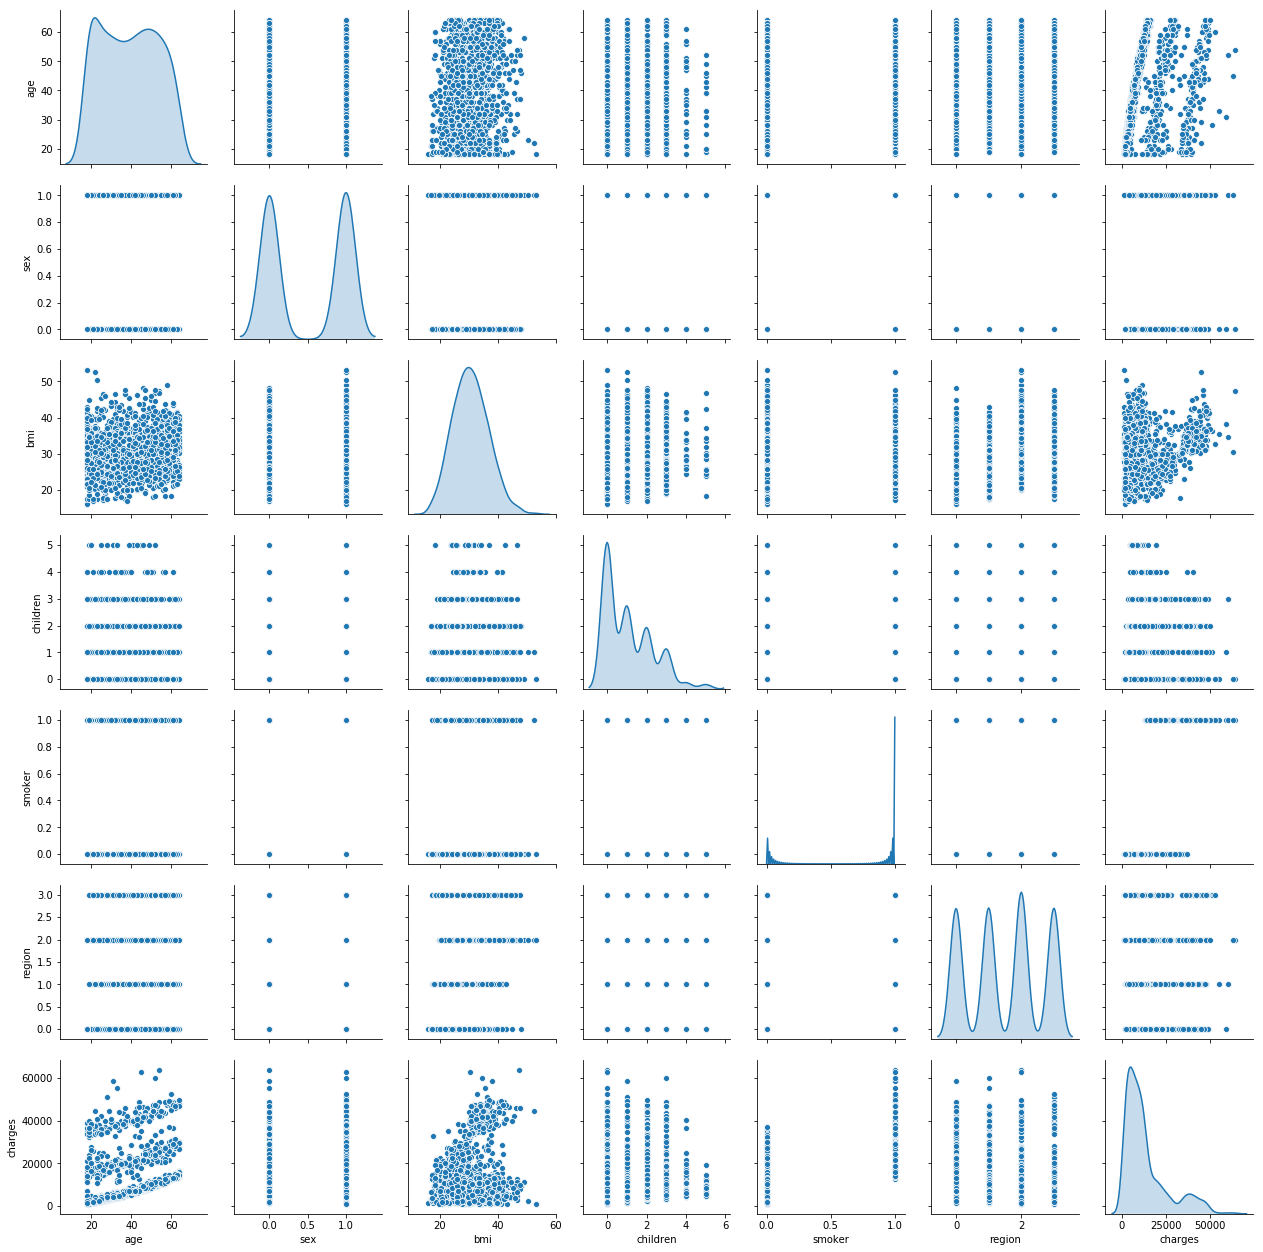

In [61]:
sns.pairplot(data, diag_kind = "kde");

### Insights from pair plot

- Age and BMI do not seems to be correlated 
- BMI looks like near normal distribution
- 4 primary peaks seens in 0, 1, 2, 3 children. Smaller 2 peaks seen at 4 and 5 children
- Age and charges also do not seem to be correlated
- Smoking seems to have a very strong corelation with charges. People who smoke pay more charges. 
- Region wise there is no difference in charges
- When seen without hue Charges also has no visible strong correlation with age and bmi. Check later plot with 'smoker' hue for more inference on this. 
- Charges seems to be a bi-modal distribution - a lower value peak and a higher value peak. This suggests that it might be due to smoker/non-smoker distribution in sample. Smokers pay higher charge compared to non-smoker. This is tested in pairplot with 'smoker' hue. 
- Every region seems to be very well distributed amoung the ages selected. 
- Region 3 (Northwest) seems to have higher BMI (though not tested statistically)
- Region 2 (Southeast) has lower spread of BMI

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


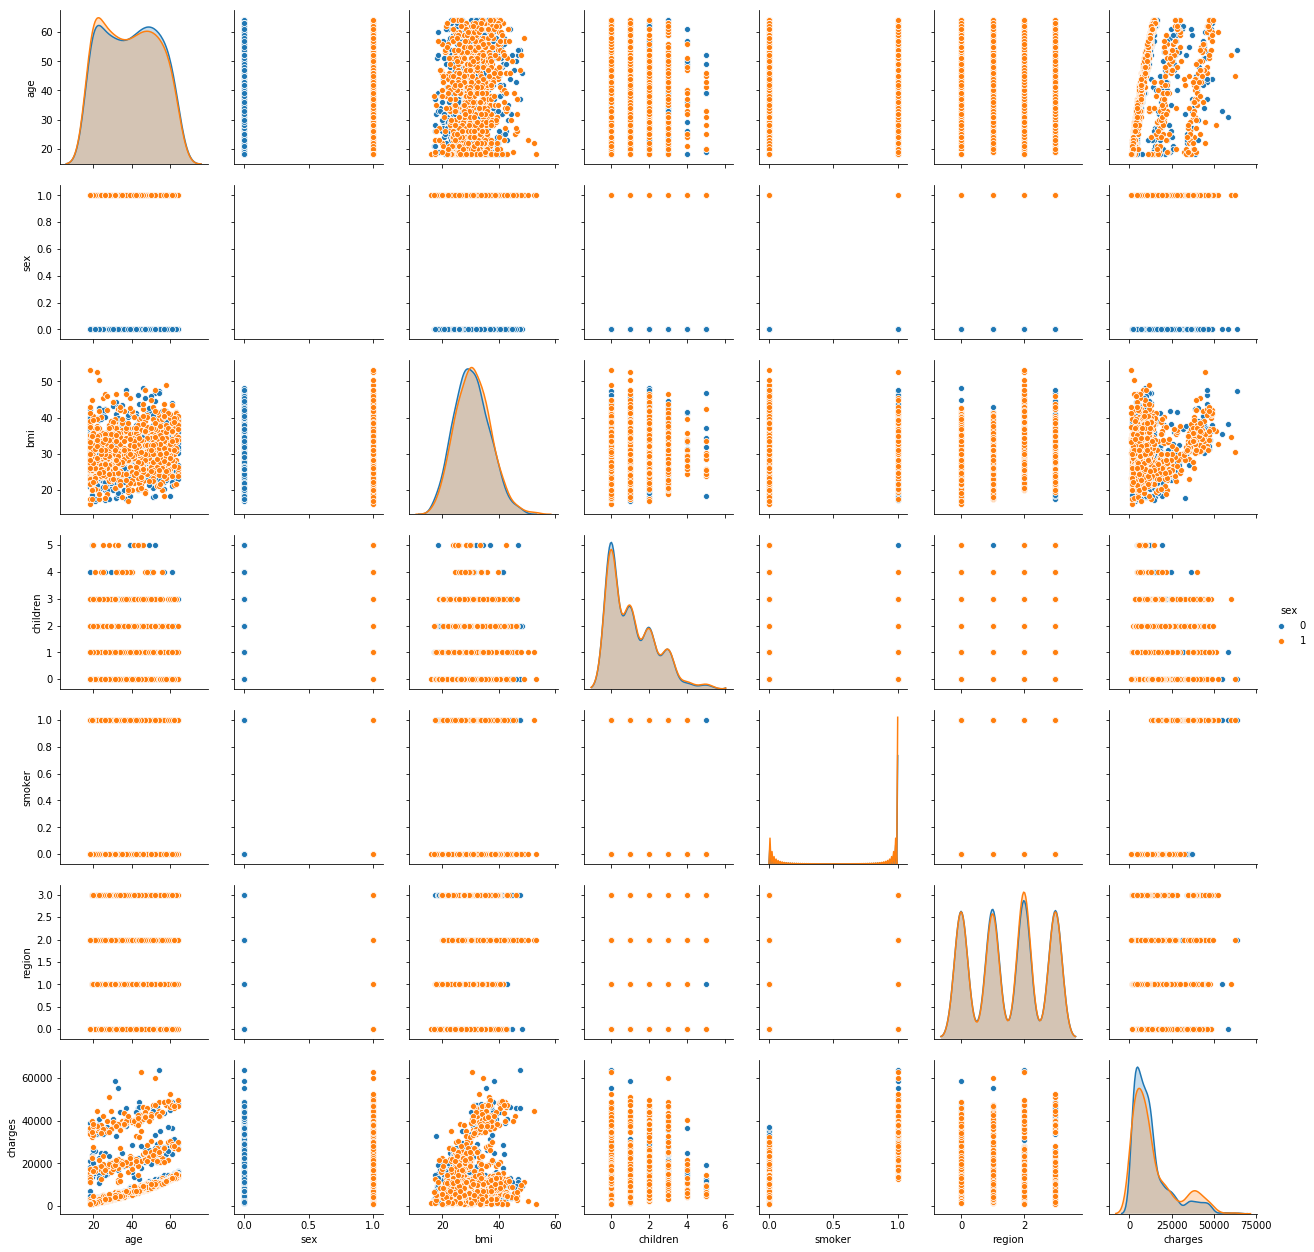

In [62]:
sns.pairplot(data, hue = 'sex', diag_kind = "kde");

#### Insights from pair plot with gender hue

- The plots are overlapping and not much conclusion can be drawn
- General conclusion for either gender is simular to what was concluded for the whole population

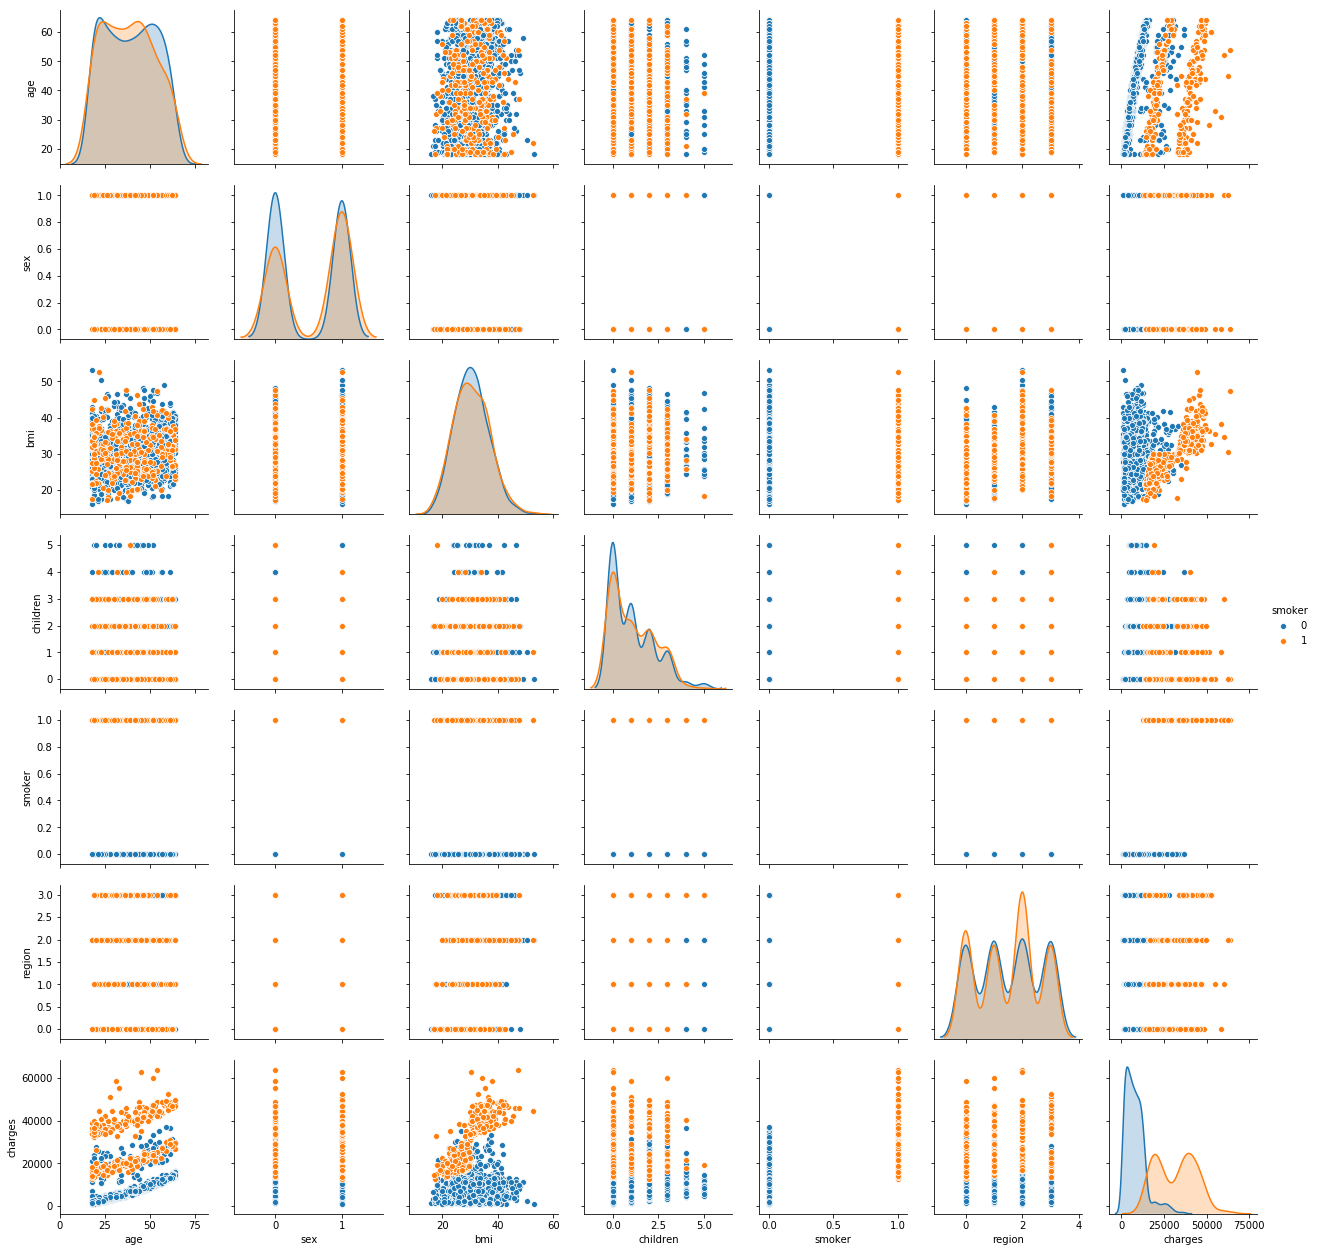

In [63]:
sns.pairplot(data, hue = 'smoker', diag_kind = "kde");

#### Insights from pair plot with smoker hue

- Smoker has significanytly higher charges as compared to non-smokers. One can see the clear demarkation. This seen in all subcases as well (eg: region break up, gender break up, age break up etc)
- For smoker high bmi shows higher charges, no such relation is observed for non - smokers. But smokers do not necessarily have a higer BMI though. 
- Hence high BMI people smoking will lead to higher charges
- South east region (2) has higher number of smokers compared to other regions. 
- Non-smokers are similar in all regions


#### For asthetic purpose of remaining outputs, redoing the encoding

In [64]:
data['sex']= label_encoder3.inverse_transform(data['sex']) 
data['sex'].head()

0    female
1      male
2      male
3      male
4      male
Name: sex, dtype: object

In [65]:
data['smoker']= label_encoder.inverse_transform(data['smoker']) 
data['smoker'].head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

In [66]:
data['region']= label_encoder2.inverse_transform(data['region']) 
data['region'].head()

0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
Name: region, dtype: object

### Checking for validity of Central Limit Theorem before proceding to perform hypothesis testing
- 20000 sample means of smaple size 81 are used to create sampling distribution of 'age', 'bmi', 'charges', 'children' 

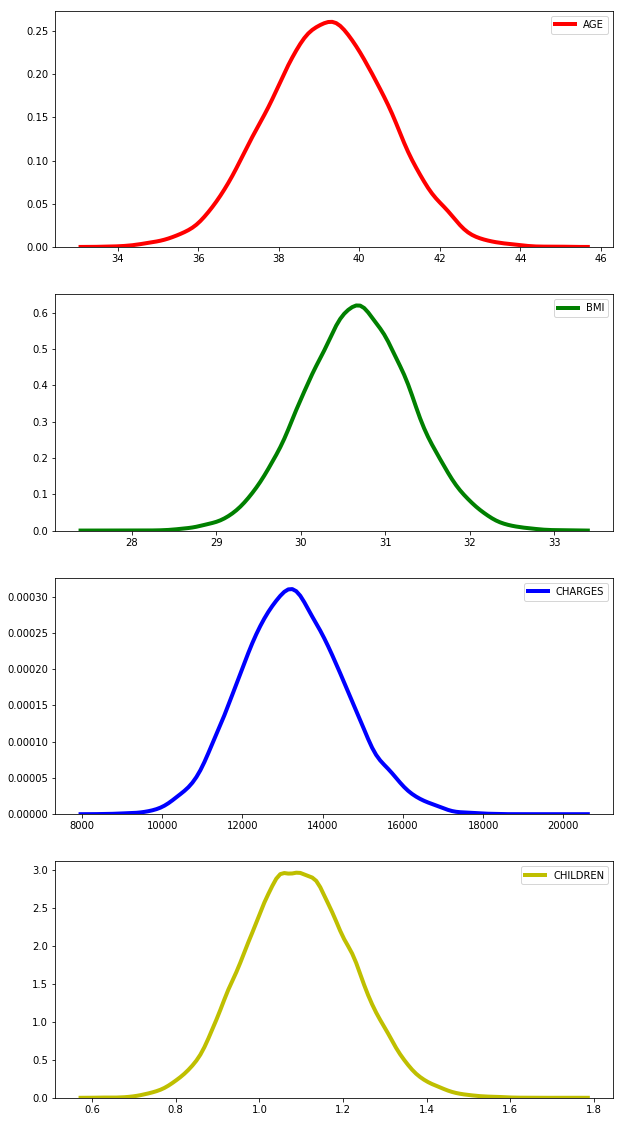

In [67]:
r = np.arange(20000)
age = []
bmi = []
charges = []
children = []
smoker = []
for x in r:
    ns = data.sample(81)
    age.append(ns.age.mean())
    bmi.append(ns.bmi.mean())
    charges.append(ns.charges.mean())
    children.append(ns.children.mean())
    
    
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (10,20))
sns.distplot(age, hist = False, kde_kws={"color":"r", "lw": 4, "label": "AGE"}, ax = axes[0]);
sns.distplot(bmi, hist = False, kde_kws={"color":"g", "lw": 4, "label": "BMI"}, ax = axes[1]);
sns.distplot(charges, hist = False, kde_kws={"color":"b", "lw": 4, "label": "CHARGES"}, ax = axes[2]);
sns.distplot(children, hist = False, kde_kws={"color":"y", "lw": 4, "label": "CHILDREN"}, ax = axes[3]);


### Insights 
- All sampling distributions are found to be normal 
- Central limit theoren is valid

## Do charges of people who smoke differ significantly from the people who don't?

##### Answer:
First we use the box and distribution plots to see if there are visible differences between the charges billed by insurance to smoker and non smokers. <br>
After developing an idea on smoking affects medical charges we perform hypothesis testing with 5% confidence. 

#### Visual Analysis

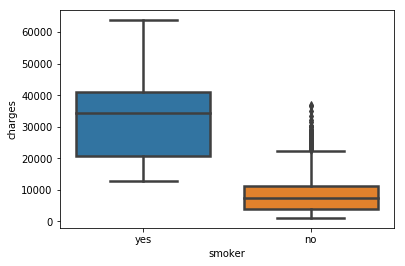

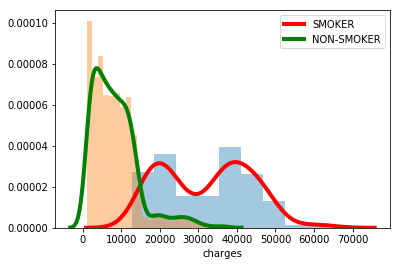

In [68]:

sns.boxplot(x="smoker", y="charges", data=data, linewidth=2.5);
plt.show()
data_smoker = data[data['smoker'] == 'yes']
data_nonsmoker = data[data['smoker'] == 'no']
sns.distplot(data_smoker.charges, kde_kws={"color":"r", "lw": 4, "label": "SMOKER"})
sns.distplot(data_nonsmoker.charges, kde_kws={"color":"g", "lw": 4, "label": "NON-SMOKER"})
plt.show()

### Insights from visual analyis
- BOX PLOT: - From thebox plot it is seen that smokers have significantly higher charges than non-smokers <br>
            - Even the lower whisker of the box plot for smokers is more (charges) as compared to the 75 percentile value of the non-smoker data
            - It is also seen that the non-smoker (0), has a lot of high outliers. This suggests that there are some people who end up with high medical charges although they do not smoke. 
            - Both distributions are positively skewed

- DISTRIBUTION PLOT: - Non Smoker is a uni-modal distribution while smoker charges relation is bimodal
                    - This suggests that some smokers pay very high charges while some smokers pay lower charges (compard to other smokers). Even the lower peak is higher than most of the charges that non-smokers pay
                    

#### Statistical Analysis (Hypothesis testing)
We conduct an 2-sample indepndent t-test with 5% significance to test if the distribution of charges paid by smokers is altually statistically different from those paid by non-smokers
For this:
    
    - NULL HYPOTHESIS (H0): There is no difference between the charges paid by smokers and non-smokers
    - ALTERNATE HYPOTHESIS (H1): There is significant difference between the charges paid by smokers and non-smokers

In [69]:
t_statistic, p_value  =  stats.ttest_ind(data_smoker.charges, data_nonsmoker.charges)
print('P Value %1.3e' % p_value) 
print('T Statistic Value %1.3f' % t_statistic) 

P Value 8.271e-283
T Statistic Value 46.665


### Insights from Statistical Analysis regarding the charges paid by smokers and non-smokers
Since the p-value is found to be very very low (8.271e-283) and it is less than 0.05 (5% significance), we can REJECT the NULL Hypothesis (H0).<br>
This means that we can say with 95% statistical confidence that "There is significant difference between the charges paid by smokers and non-smokers"

### Does bmi of males differ significantly from that of females?

#### Answer:
First we use the box and distribution plots to see if there are visible differences between the bmi of males and females in the dataset.
After developing an idea on bmi of males and females in the data set we perform hypothesis testing with 95% confidence.

#### Visual Analysis

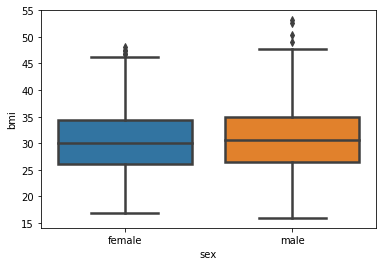

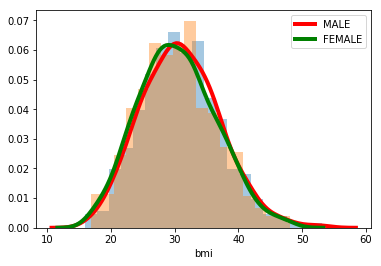

In [70]:
sns.boxplot(x="sex", y="bmi", data=data, linewidth=2.5);
plt.show()
data_male = data[data['sex'] == 'male']
data_female = data[data['sex'] == 'female']
sns.distplot(data_male.bmi, kde_kws={"color":"r", "lw": 4, "label": "MALE"})
sns.distplot(data_female.bmi, kde_kws={"color":"g", "lw": 4, "label": "FEMALE"})
plt.show()

### Insights from Visual Analysis
- From both the BOX and the DISTRIBUTION plots it is seen that not much can be concluded on if gender has an effect on BMI
- It is also seen that both the distributions are very close to normal distribution
- Males have a few higher value high outliers

#### Statistical Inference (Hypothesis testing using 2-sample independent t-test at 95% confidence)
We conduct an 2-sample indepndent t-test wiht 5% significance to test if the distribution of bmi of male and female in the dataset is actually statistically different. For this:
- NULL HYPOTHESIS (H0): There is no difference between the bmi of male and female
- ALTERNATE HYPOTHESIS (H1): There is significant difference between the bmi of male and female

In [71]:
t_statistic, p_value  =  stats.ttest_ind(data_female.bmi, data_male.bmi)
print('P Value %1.3f' % p_value) 
print('T Statistic Value %1.3f' % t_statistic) 

P Value 0.090
T Statistic Value -1.697


### Insights from Statistical Analysis regarding the bmi of male and female
Since the p-value is found to be 0.09 and it is more than 0.05 (5% significance), we FAIL TO REJECT the NULL Hypothesis (H0).
This means that we can say with 95% statistical confidence that "There is no significant difference between the bmi of male and female"


### Is the proportion of smokers significantly different in different genders?

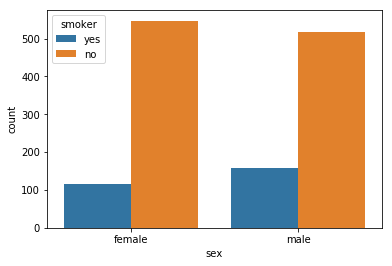

In [72]:
sns.countplot(x='sex', hue = 'smoker', data = data)
plt.show()


#### Insights from visual inspection
- Not much can be said from the visual inspection

#### Statistical Analysis (Chi Square test)

- First a first principle approach is applied to calculate chi square and p value (for personal undertstanding of concept)
- then this is verified using inbuilt functions

In [73]:
label_encoder5 = preprocessing.LabelEncoder() 
data_female['smoker']= label_encoder5.fit_transform(data_female['smoker']) 
label_encoder6 = preprocessing.LabelEncoder() 
data_male['smoker'] = label_encoder6.fit_transform(data_male['smoker'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [74]:
num_male, dummy = data_male.shape
num_female, dummy = data_female.shape
num_female_smoker = data_female['smoker'].sum()
female_smoker_prop = num_female_smoker/num_female
print('Number of females in the data set =', num_female)
print('Number of female smoker in the data set =', num_female_smoker)
print("Female Smoker proportion =", female_smoker_prop)
num_male_smoker = data_male['smoker'].sum()
male_smoker_prop = num_male_smoker/num_male
print('Number of males in the data set =', num_male)
print('Number of male smoker in the data set =', num_male_smoker)
print("Male Smoker proportion =",male_smoker_prop)

Number of females in the data set = 662
Number of female smoker in the data set = 115
Female Smoker proportion = 0.17371601208459214
Number of males in the data set = 676
Number of male smoker in the data set = 159
Male Smoker proportion = 0.23520710059171598


### Null Hypothese: 
The proportions of male and female smokers do not vary significantly
### Alternate Hypothesis:
The proportions of male and female smokers vary significantly


Let us assume Null hypothesis is true. In that case the proportion of make and female smokers should be 0.5 and 0.5 if males and females are same in number in the dataset. <br>
But male and female are themselves distributed as ratio 676 males/662 females 

Thus for null hypothesis is to be true the expected male smokers should be (676/(676+662))x274 (274 is the total smokers in the data set) <br>

Also, for null hypothesis is to be true the expected female smokers should be (662/(676+662))x274
This will lead to equal proportions of male and female smokers

In [75]:
male_smoker_expected = (676/(676+662))*274
female_smoker_expected = (662/(676+662))*274
print('Male smokers expected for Null Hypothesis to be valid =', male_smoker_expected)
print('Female smokers expected for Null Hypothesis to be valid =', female_smoker_expected)
male_smoker_expected_prop = male_smoker_expected/num_male
female_smoker_expected_prop = female_smoker_expected/num_female
print("Expected male snoker proportion for Null Hypothesis to be valid = ",male_smoker_expected_prop)
print("Expected female snoker proportion for Null Hypothesis to be valid = ",female_smoker_expected_prop)

Male smokers expected for Null Hypothesis to be valid = 138.43348281016443
Female smokers expected for Null Hypothesis to be valid = 135.56651718983557
Expected male snoker proportion for Null Hypothesis to be valid =  0.2047832585949178
Expected female snoker proportion for Null Hypothesis to be valid =  0.20478325859491778


In [76]:
chi_sq = ((num_male_smoker - male_smoker_expected)**2)/(male_smoker_expected) + ((num_female_smoker - female_smoker_expected)**2)/(female_smoker_expected)
print("The chi square value = ", chi_sq)

The chi square value =  6.175590414376029


#### Degrees of freedom for this case is (2-1)x(2-1) = 1

In [77]:
p_crit=stats.chi2.ppf(q = 0.95, df = 1) 
print("Critical value of chi square =", p_crit)
print("The two sided p value for the chi sq value computed is = ", (1 - stats.chi2.cdf(6.175590414376029, 1))*2)

Critical value of chi square = 3.841458820694124
The two sided p value for the chi sq value computed is =  0.025904936110098475


#### Verification of the above calculation using python's sklearn chisqaure function


In [78]:
observed = np.array([num_female_smoker, num_male_smoker])
expected = np.array([female_smoker_expected, male_smoker_expected])
chi, p = stats.chisquare(observed,expected)
print("The chi sqaure value from sklearn.preprocessing.chisquare is ", chi)
print("The 2 sided p value from sklearn.preprocessing.chisquare is ", p*2)

The chi sqaure value from sklearn.preprocessing.chisquare is  6.175590414376029
The 2 sided p value from sklearn.preprocessing.chisquare is  0.025904936110098368


### Now since the observed chi square value (6.175590414376029) is greater than the critical value (3.841458820694124), and the two sided p- value obtained (0.026) less than 0.05(95% significance) than we can REJECT THE NULL HYPOTHESIS.
- Thus there is significant difference between the smokers in male and female datasets

## Is the distribution of bmi across women with no children, one child and two children, the same ?

#### Visual Inspection of the distributions
- For visual inspection we use distplot to see how the distributions of bmi over lap for the required condition of number of children
- We also look at the box plot to see if the 5 point numbers show any marked differences for the distributions under question

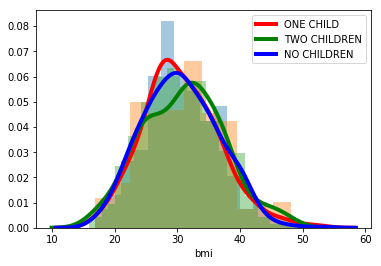

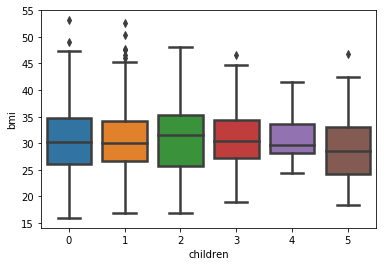

In [79]:
data_one_chil_female = data[data['children'] == 1]
data_zero_chil_female = data[data['children'] == 0]
data_two_chil_female = data[data['children'] == 2]
sns.distplot(data_one_chil_female.bmi, kde_kws={"color":"r", "lw": 4, "label": "ONE CHILD"})
sns.distplot(data_two_chil_female.bmi, kde_kws={"color":"g", "lw": 4, "label": "TWO CHILDREN"})
sns.distplot(data_zero_chil_female.bmi, kde_kws={"color":"b", "lw": 4, "label": "NO CHILDREN"})
plt.show()
sns.boxplot(x="children", y="bmi", data=data, linewidth=2.5);
plt.show()

##### Visual inspection do not lead to any conclusions of interest

#### Statistical test 
- For this we use the ANOVA test 
- But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. 
- The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
                                                           
##### NULL HYPOTHESIS FOR LEVINE TEST
All input samples are from populations with equal variances
                                                           
##### ALTERNATE HYPOTHESIS FOR LEVINE TEST
The samples are drawn from populations with unequal variances

In [80]:
statistic, p_value  =  stats.levene(data_zero_chil_female.bmi, data_one_chil_female.bmi, data_two_chil_female.bmi)
print('P Value %1.3f' % p_value) 
print('T Statistic Value %1.3f' % t_statistic) 

P Value 0.329
T Statistic Value -1.697


##### Insights from LEVINE TEST
- It is seen that the p value (0.329) is greater than the required statistical significance value (0.05). 
- Hence we FAIL TO REJECT THE NULL HYPOTHESUS
- The samples are drawn from populations of equal variances
- ANOVA can be performed with this data set

#### ANOVA TEST
##### NULL HYPOTHESIS FOR ANOVA
- None of the samples (0 child, 1 child or 2 children) have different bmi as compared to the others

##### ALTERNATE HYPOTHESIS FOR ANOVA
- Atleast one of the samples (0 child, 1 child or 2 children) have different bmi as compared to the others

In [81]:
statistic, p_value  =  stats.f_oneway(data_zero_chil_female.bmi, data_one_chil_female.bmi, data_two_chil_female.bmi)
print('P Value %1.3f' % p_value) 
print('T Statistic Value %1.3f' % t_statistic) 

P Value 0.659
T Statistic Value -1.697


##### Since the p-value (0.659) obtained is greater than the level of significance for this case (5%), we FAIL TO REJECT NULL HYPOTHESIS
- The distribution of bmi across women with no children, one child and two children is the same